# Telco Customer Churn

Description:

Customer Churn means loss of customers/clients
With the rapid development of the telecommunications industry, service providers tend to lean towards the expansion of subscriber base because they are the business target market. Telephone service companies, internet service providers, TV companies and insurance firms, often using customer churn analysis and customer churn rates as one of their key business metrics because maintaining existing customers cost is much lower than receiving a new one.

Therefore, it can help to estimate customer support by gathering knowledge from the telecommunications industry, whether they will leave the company or not. Telecommunication industries need to take necessary action to take initiatives to acquire their affiliate customers to stabilize their market value

Data Overview:


•	Rows (represents customer) :7043


•	Columns (represents customer’s attributes) :21


Problem Statement:
Predict behavior to retain customers i.e. we need to analyze all relevant customer data and develop focused customer retention program.

In [101]:
#importing all the packages 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [102]:
#Read the dataset and display the first five entries using head function.
telco = pd.read_csv('C:\\Users\\sshah\\Desktop\\MVA\\project\\Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
#Display the number of dimensions in the array. 
telco.shape

(7043, 21)

In [104]:
#nunique() method is used to get number of all unique values in all the columns.
print(telco.info())
telco.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [105]:
#Replacing the blank spaces in Total Charges column with Nan.
telco['TotalCharges'] = telco["TotalCharges"].replace(" ",np.nan)

telco = telco[telco["TotalCharges"].notnull()]
telco = telco.reset_index()[telco.columns]

#Converting Total charges column values to float.
telco["TotalCharges"] = telco["TotalCharges"].astype(float)

In [106]:
#Using the sum we get the count of NaN's for each column
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [107]:
#Replace Numeric 0's and 1's in SeniorCitizen column with 'No' and 'Yes'.
telco['SeniorCitizen'] = telco['SeniorCitizen'].replace({1:'Yes', 0:'No'})
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [108]:
#Replace the column value in of different columns.
columns_to_replace = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in columns_to_replace: 
    telco[i]  = telco[i].replace({'No internet service' : 'No'})
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [109]:
#Returns the max value from the tenure column.
telco["tenure"].max()

72

In [110]:
def tenure_lab(telco) :
    
    if telco["tenure"] <= 12 :
        return "1 Year"

    elif (telco["tenure"] > 12) & (telco["tenure"] <= 24) :
        return "1-2 Year"
    
    elif (telco["tenure"] > 24) & (telco["tenure"] <= 48) :
        return "2-3 Year"
    
    elif (telco["tenure"] > 48) & (telco["tenure"] <= 60) :
        return "3-4 Year"
    
    elif telco["tenure"] > 60  & (telco["tenure"] <= 72) :
        return "4-5 Year"

In [111]:
telco["tenure"] = telco.apply(lambda telco:tenure_lab(telco), axis = 1)

In [112]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1 Year,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,2-3 Year,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,1 Year,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,2-3 Year,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,1 Year,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
#Distinguish Churn and non-churn customers.
churn_yes = telco[telco["Churn"]=="Yes"]
churn_no = telco[telco["Churn"]=="No"]

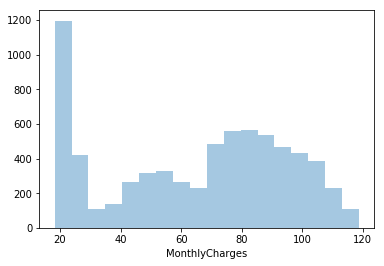

In [114]:
sns.distplot(telco['MonthlyCharges'],kde=False)

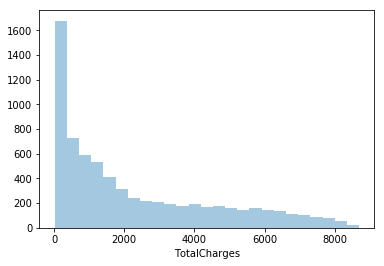

In [115]:
sns.distplot(telco['TotalCharges'],kde=False)

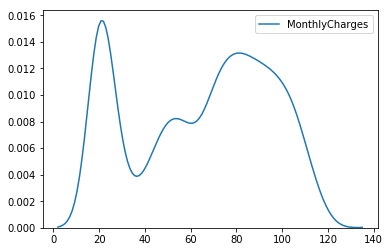

In [116]:
sns.kdeplot(telco['MonthlyCharges'])

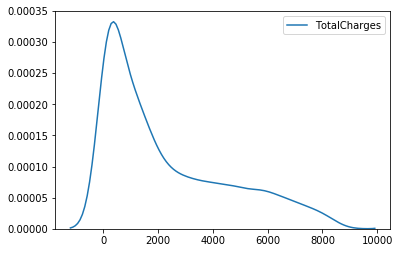

In [117]:
sns.kdeplot(telco['TotalCharges'])

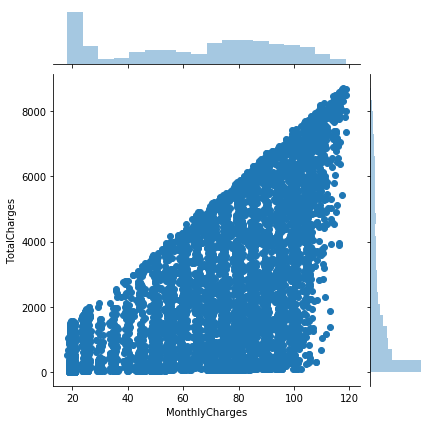

In [118]:
sns.jointplot(x='MonthlyCharges',y='TotalCharges',data=telco)

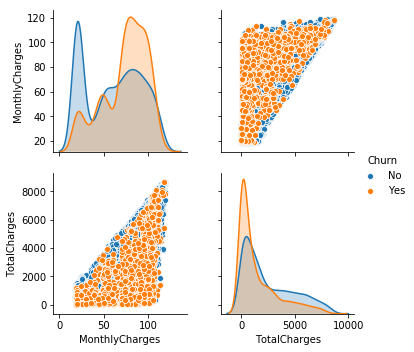

In [119]:
sns.pairplot(telco,hue='Churn')

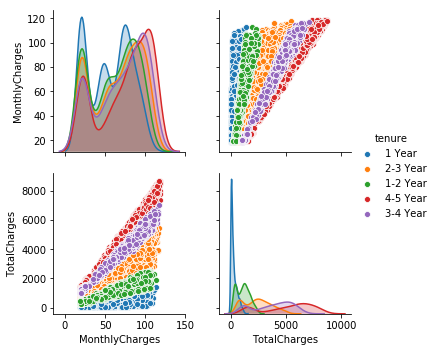

In [120]:
sns.pairplot(telco,hue='tenure')

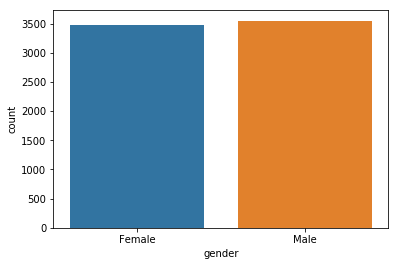

In [121]:
sns.countplot(x='gender',data=telco)

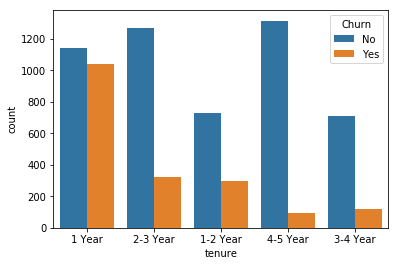

In [122]:
sns.countplot(x='tenure',data=telco,hue='Churn')

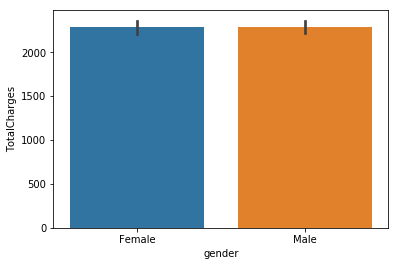

In [123]:
sns.barplot(x='gender',y='TotalCharges',data=telco)

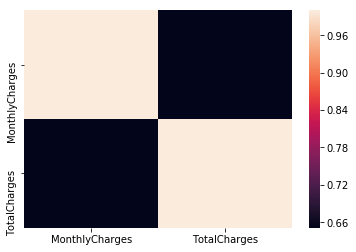

In [124]:
t = telco.corr()
sns.heatmap(t)

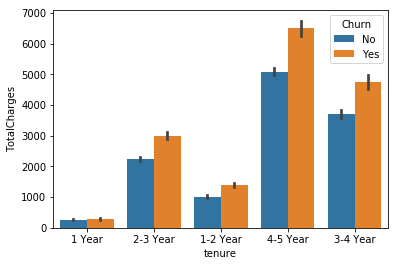

In [125]:
sns.barplot(x='tenure',y='TotalCharges',data=telco,hue='Churn')

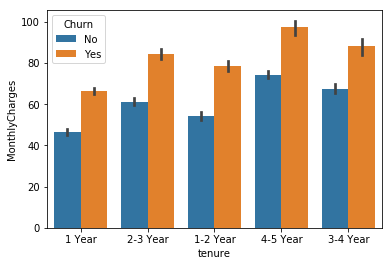

In [126]:
sns.barplot(x='tenure',y='MonthlyCharges',data=telco,hue='Churn')

In [127]:
correlation = telco.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)
corr_array

array([[1.       , 0.6510648],
       [0.6510648, 1.       ]])